<a href="https://colab.research.google.com/github/ferreirabruno7/machine_learning/blob/master/Ceub_Aula_3_Aluguel_Sao_Paulo_Visualiza%C3%A7%C3%A3o_e_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dados aluguel são paulo

In [18]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

In [20]:
#1.	Carregue o conjunto de dados de preços de imóveis em São Paulo a partir de uma fonte csv e verifique o número de linhas e colunas no conjunto de dados.
aluguel = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dados_sao_paulo.csv", delimiter = ',', encoding='utf-8')
aluguel.head()

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
0,1600,57,2,0,1,1,VL DA SAUDE,Sao Paulo,1,3,9165861
1,5600,143,4,1,2,2,ITAIM BIBI,Sao Paulo,1,3,8657016
2,3000,140,3,1,1,3,BROOKLIN,Sao Paulo,1,2,9245580
3,4000,70,2,1,1,4,CAMPO BELO,Sao Paulo,1,2,8788916
4,2500,80,2,1,2,5,PERDIZES,Sao Paulo,1,1,9257792


In [21]:
#2.	Verifique o tipo de dados de cada coluna e verifique se há valores ausentes no conjunto de dados.
aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28879 entries, 0 to 28878
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   valor      28879 non-null  int64 
 1   area       28879 non-null  int64 
 2   quartos    28879 non-null  int64 
 3   suites     28879 non-null  int64 
 4   vagas      28879 non-null  int64 
 5   bairro_id  28879 non-null  int64 
 6   bairro     28879 non-null  object
 7   cidade     28879 non-null  object
 8   tipo       28879 non-null  int64 
 9   subtipo    28879 non-null  int64 
 10  id         28879 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.4+ MB


<AxesSubplot:>

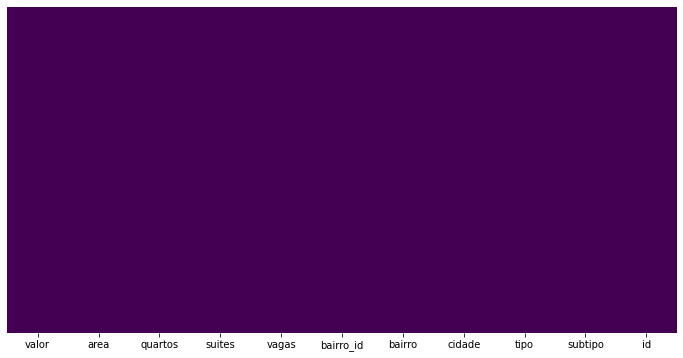

In [22]:
##visualização dos dados Faltantes
plt.figure(figsize=(12,6))
sns.heatmap(aluguel.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

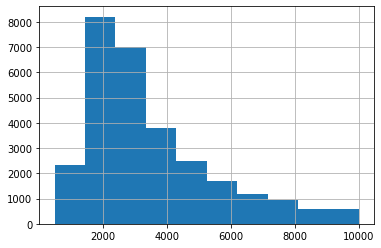

In [23]:
#3.	Crie um histograma para a coluna "preço".

aluguel['valor'].hist()

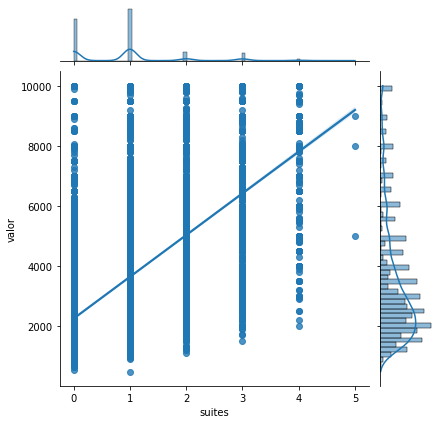

In [24]:
#4.	Crie um gráfico de dispersão para a coluna "suítes" versus a coluna "preço".
sns.jointplot(x='suites', y='valor', data=aluguel, kind='reg')


In [26]:
# 5.	Calcule a média do preço dos imóveis por bairro.

media_por_bairro = aluguel.groupby('bairro')['valor'].mean().sort_values(ascending=False).reset_index()
media_por_bairro

,bairro,valor
0,JD MORUMBI,6699.8
1,CITY PINHEIROS,6650.0
2,BOAÇAVA,6000.0
3,CID JARDIM,6000.0
4,VL MORUMBI,6000.0
...,...,...
444,JD STA MARIA,800.0
445,PTE PEQUENA,800.0
446,GUAIANAZES,750.0
447,JD MACEDÔNIA,650.0


In [27]:
#	6.	Calcule a média do preço dos imóveis por número de quartos.

media_por_bairro = aluguel.groupby('quartos')['valor'].mean().sort_values(ascending=False).reset_index()
media_por_bairro

,quartos,valor
0,5,6930.384615
1,6,6533.333333
2,4,6178.496066
3,8,6000.000000
4,3,4012.803967
5,0,3546.250000
6,2,2751.811754
7,1,2744.059859


In [30]:
#7.	Verifique a correlação entre o número de quartos e o preço dos imóveis.
dados = aluguel.loc[:, ['valor', 'quartos']]
corr = dados.corr()
corr

,valor,quartos
valor,1.000000,0.427192
quartos,0.427192,1.000000


<AxesSubplot:xlabel='vagas', ylabel='valor'>

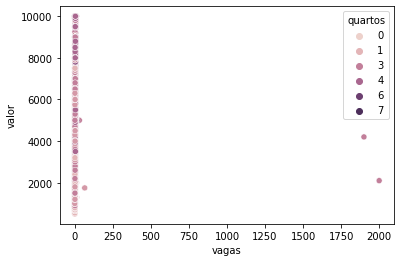

In [32]:
# 8.	Crie um gráfico de dispersão para a coluna "vagas" versus a coluna "price", colorido por número de quartos.
sns.scatterplot(x='vagas', y='valor', hue='quartos', data=aluguel)


In [45]:
contagem_bairros = aluguel.groupby('bairro')['valor'].count()
contagem_bairros

bairro
A E CARVALHO           3
ACLIMAÇÃO            266
AEROPORTO              4
ALTO DA BOA VISTA    202
ALTO DA LAPA         171
                    ... 
Vila Formosa          77
ÁGUA BRANCA           79
ÁGUA FRIA             16
ÁGUA FUNDA            11
ÁGUA RASA             38
Name: valor, Length: 449, dtype: int64

In [51]:
bairros_filtrados = contagem_bairros[contagem_bairros > 100].index.tolist()


In [52]:
dados_boxplot = aluguel.loc[aluguel['bairro'].isin(bairros_filtrados), ['bairro', 'valor']]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, 'ITAIM BIBI'),
  Text(1, 0, 'BROOKLIN'),
  Text(2, 0, 'CAMPO BELO'),
  Text(3, 0, 'PERDIZES'),
  Text(4, 0, 'JD PAULISTA'),
  Text(5, 0, 'MORUMBI'),
  Text(6, 0, 'CONSOLAÇÃO'),
  Text(7, 0, 'PANAMBY'),
  Text(8, 0, 'MOEMA'),
  Text(9, 0, 'CH STO ANTÔNIO'),
  Text(10, 0, 'VL OLÍMPIA'),
  Text(11, 0, 'VL ANDRADE'),
  Text(12, 0, 'MOOCA'),
  Text(13, 0, 'TATUAPÉ'),
  Text(14, 0, 'CH KLABIN'),
  Text(15, 0, 'SAÚDE'),
  Text(16, 0, 'IPIRANGA'),
  Text(17, 0, 'JAGUARÉ'),
  Text(18, 0, 'CERQUEIRA CÉSAR'),
  Text(19, 0, 'VL MASCOTE'),
  Text(20, 0, 'VL NOVA CONCEIÇÃO'),
  Text(21, 0, 'POMPÉIA'),
  Text(22, 0, 'JD AMÉRICA'),
  Text(23, 0, 'BUTANTÃ'),
  Text(24, 0, 'JABAQUARA'),
  Text(25, 0, 'BARRA FUNDA'),
  Text(26, 0, 'CH INGLESA

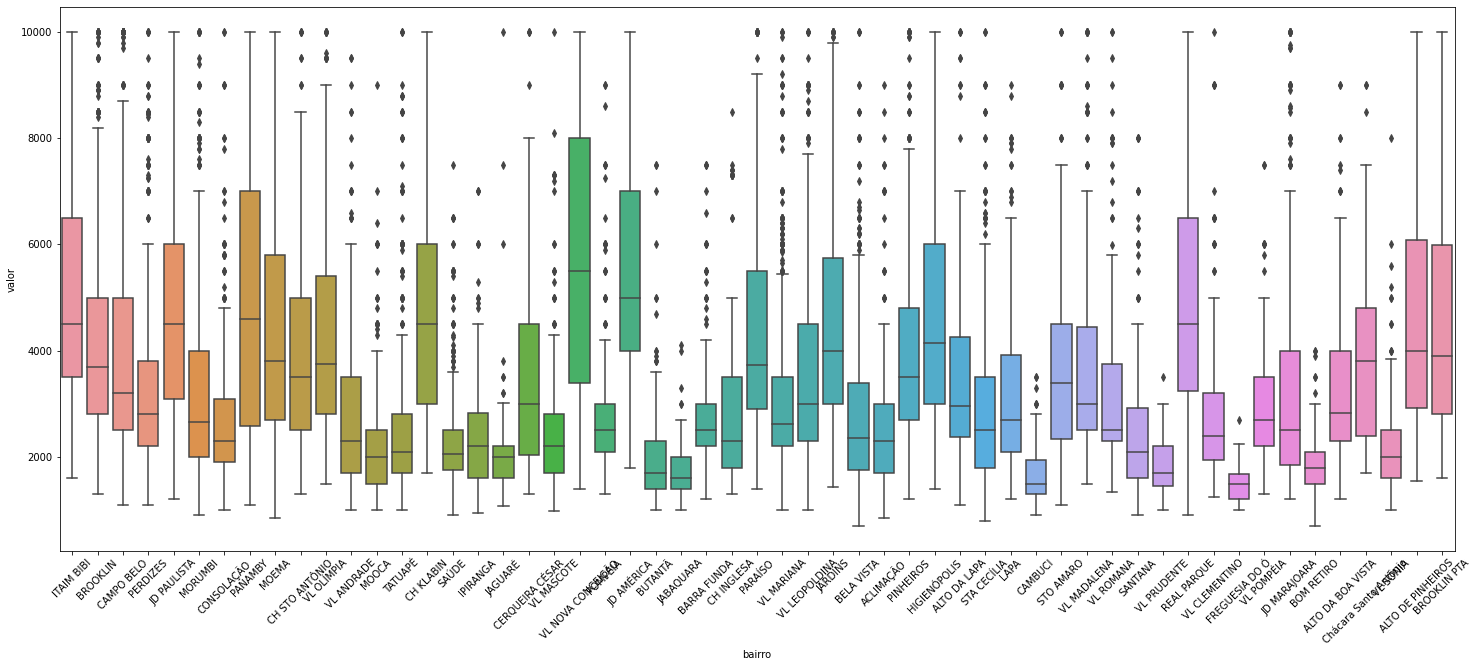

In [60]:
## risco de clientes indadimplmentes 
plt.figure(figsize=(25,10))

sns.boxplot(x='bairro', y='valor', data=dados_boxplot)
plt.xticks(rotation=45)


<AxesSubplot:>

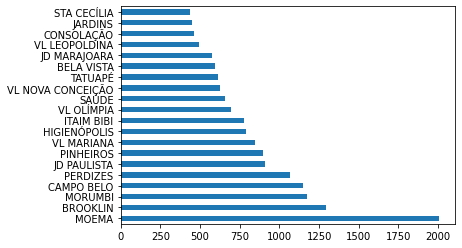

In [67]:
aluguel['bairro'].value_counts()[:20].plot(kind='barh')


<AxesSubplot:ylabel='bairro'>

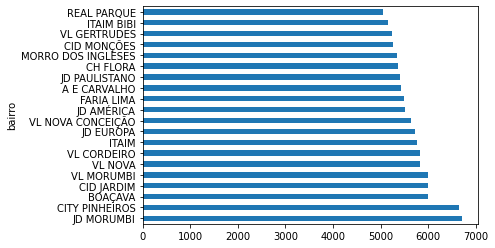

In [71]:
aluguel.groupby('bairro')['valor'].mean().sort_values(ascending=False)[:20].plot(kind='barh')

In [73]:
aluguel

,valor,area,quartos,suites,vagas,bairro_id,bairro,cidade,tipo,subtipo,id
0,1600,57,2,0,1,1,VL DA SAUDE,Sao Paulo,1,3,9165861
1,5600,143,4,1,2,2,ITAIM BIBI,Sao Paulo,1,3,8657016
2,3000,140,3,1,1,3,BROOKLIN,Sao Paulo,1,2,9245580
3,4000,70,2,1,1,4,CAMPO BELO,Sao Paulo,1,2,8788916
4,2500,80,2,1,2,5,PERDIZES,Sao Paulo,1,1,9257792
...,...,...,...,...,...,...,...,...,...,...,...
28874,1800,70,2,1,1,327,VL POLOPOLI,Sao Paulo,1,2,9645207
28875,1200,60,2,0,1,130,VL BUTANTÃ,Sao Paulo,1,4,9645215
28876,2600,90,3,1,2,99,TUCURUVI,Sao Paulo,1,2,7727709
28877,2200,82,3,1,1,95,VL SÔNIA,Sao Paulo,1,2,9645107


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [74]:
X = aluguel[['area', 'quartos', 'suites', 'vagas']]


In [75]:
#definindo y
y = aluguel['valor']

In [76]:
#dividindo os dados em trino e teste seguindo uma ordem aleatória
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,  test_size = 0.3, random_state= 42)

In [78]:
#instância do modelo de regressão 
lr_model = LinearRegression()

In [79]:
#treinando o modelo de regressão
lr_model.fit(X_treino, y_treino)

LinearRegression()

In [80]:
#visualizando os coeficientes do modelo de regressão linear multipla
lr_model.coef_

array([ 2.09854044e+01, -3.76031052e+02,  7.33744879e+02,  4.11174861e-01])

In [81]:
#representação dos coeficientes
coefs = pd.DataFrame(lr_model.coef_, X.columns, columns=['coefs'])
coefs

,coefs
area,20.985404
quartos,-376.031052
suites,733.744879
vagas,0.411175


In [82]:
#predizendo 10 preços
lr_model.predict(X_teste)[-10:]

array([2103.79893639, 2021.97472082, 1998.8719143 , 2523.50702478,
       2252.81416943, 2105.91633849, 6472.13815923, 2462.25703876,
       3782.70936399, 7624.13992613])

In [83]:
#predição dos dados
predict = lr_model.predict(X_teste)

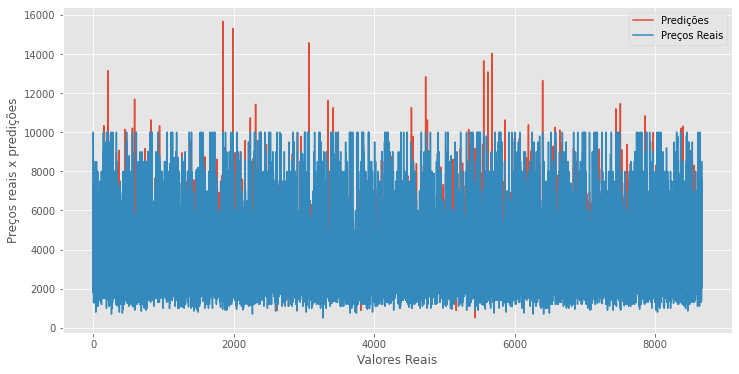

In [84]:
#aderencia entre o predito e treino, eixo x é o valor efetivo de votos e eixo Y o resultado dos testes
%matplotlib inline
predicoes = pd.DataFrame(lr_model.predict(X_teste))
y_teste = pd.DataFrame(y_teste.values)

plt.style.use("ggplot")
plt.figure(figsize=(12,6))
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.ylabel('Preços reais x predições')
plt.plot(predicoes)
plt.plot(y_teste)

#plt.scatter(y_teste, predicoes)
plt.legend(['Predições', 'Preços Reais'])


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

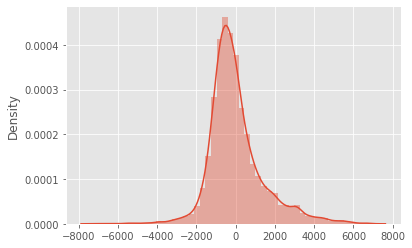

In [85]:
#distribuição normal dos valores previstos, o modelo tem um grande desvio padrão
%matplotlib inline

predicoes = pd.DataFrame(lr_model.predict(X_teste))
y_teste = pd.DataFrame(y_teste.values)
sns.distplot((y_teste-predicoes))

In [86]:
#erro médio
#quanto mais próximo de 0 melhor
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_teste, lr_model.predict(X_teste)))

MSE 1951800.2219179263


In [90]:
##média de erro do modelo na predição de votos, quanto o modelo erra. 
print('MSE', metrics.mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5)

MSE 1397.068438523298


In [89]:
from sklearn import metrics
#erros do modelo
print('MAE:', metrics.mean_absolute_error(y_teste, predict))
print('MSE:', metrics.mean_squared_error(y_teste, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predict))**0.5)

MAE: 993.12915273779
MSE: 1951800.2219179263
RMSE: 37.37737870053621


In [93]:

#valor de teste
predict = lr_model.predict(X_teste)
     

In [95]:
##simula dados de x valor gasto
preditor = lr_model.predict([[50, 2, 1,1]])
preditor

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2671.77798215])